### Netflix EDA Project

In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# 2. Load Dataset
df = pd.read_csv("C:/Users/Admin/Desktop/Netflix/netflix_titles.csv")

In [3]:
# 3. Preview and Basic Info
print("\n--- Dataset Preview ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()


--- Dataset Preview ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  S

In [4]:
# 4. Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
# 5. Data Cleaning
# Strip column names of whitespace
df.columns = df.columns.str.strip()
# Remove duplicates
df.drop_duplicates(inplace=True)
# Fill nulls in string columns with 'Unknown'
for col in ['director', 'cast', 'country', 'date_added']:
    df[col] = df[col].fillna('Unknown')

In [6]:
# 6. Descriptive Statistics
print("\n--- Descriptive Stats (Numerical Columns) ---")
print(df.describe(include=[np.number]))

print("\n--- Descriptive Stats (Object Columns) ---")
print(df.describe(include=["object"]))


--- Descriptive Stats (Numerical Columns) ---
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

--- Descriptive Stats (Object Columns) ---
       show_id   type                 title director     cast        country  \
count     8807   8807                  8807     8807     8807           8807   
unique    8807      2                  8807     4529     7693            749   
top         s1  Movie  Dick Johnson Is Dead  Unknown  Unknown  United States   
freq         1   6131                     1     2634      825           2818   

             date_added rating  duration                     listed_in  \
count              8807   8803      8804                          8807   
unique             1768     17       220                           514   
top     January 1, 2020  TV-MA  1 Season  Dramas, International Movies   
freq                109   3207  

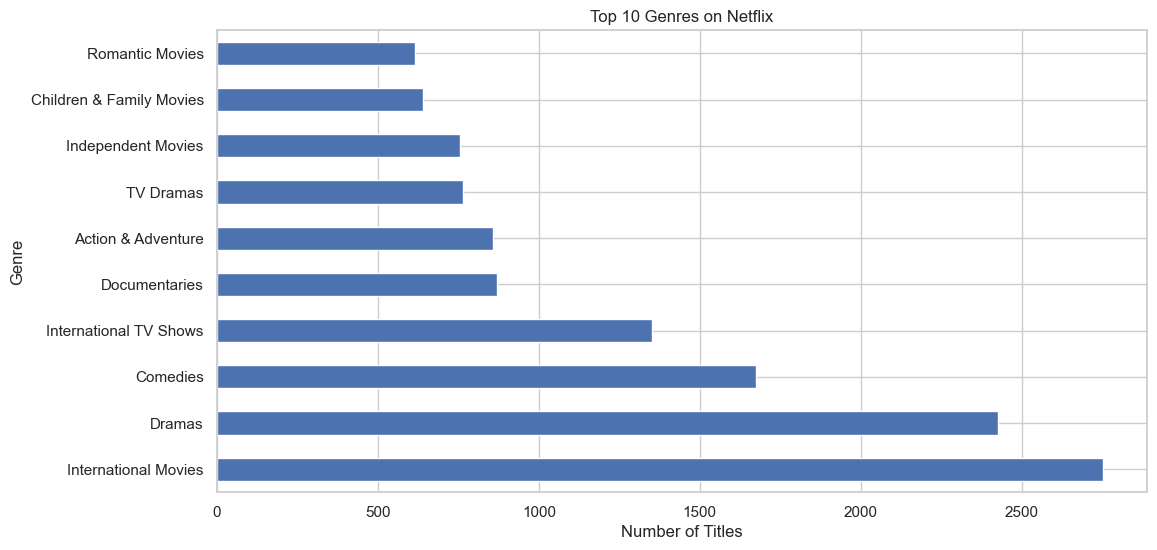

In [7]:
# 7. Data Visualization - Genre Distribution
plt.figure()
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres on Netflix')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

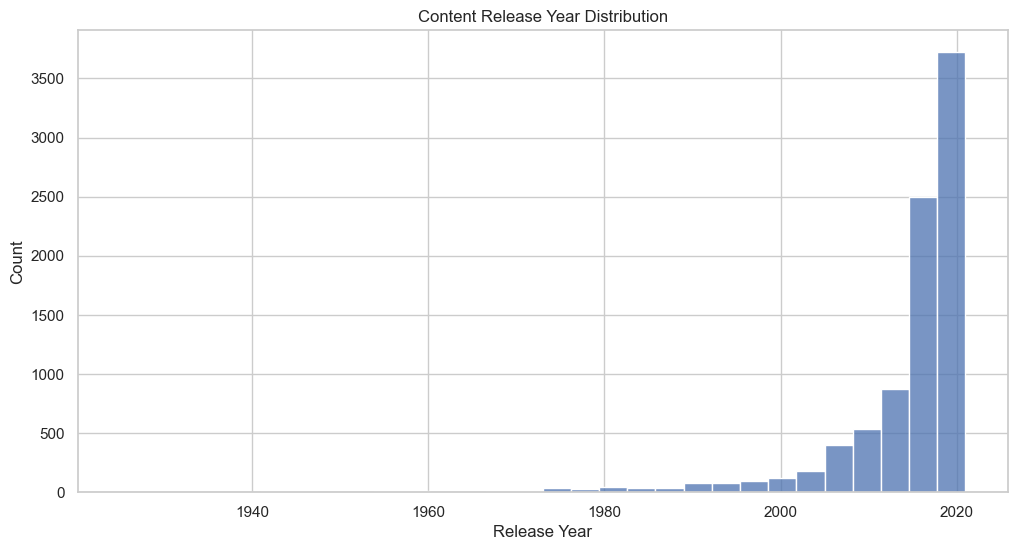

In [8]:
# 8. Data Visualization - Release Year Distribution
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

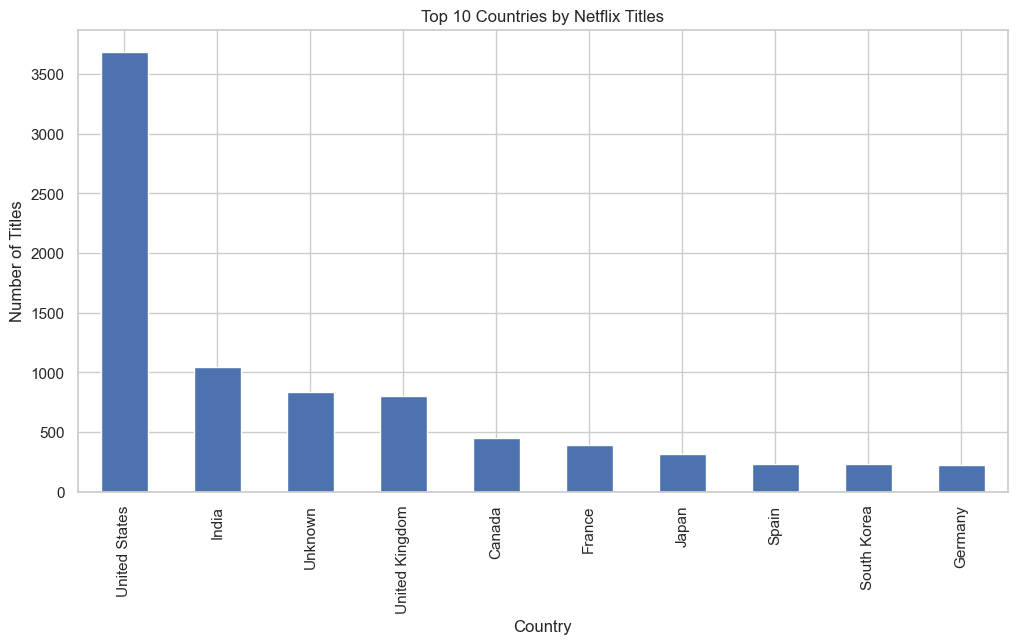

In [9]:
# 9. Data Visualization - Country Distribution
top_countries = df['country'].str.split(', ').explode().value_counts().head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Netflix Titles')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

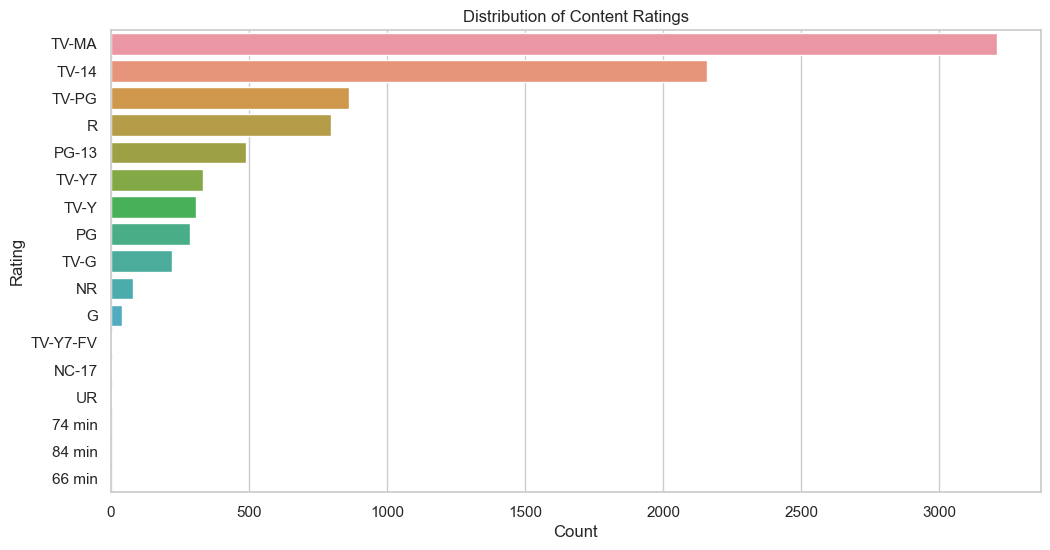

In [10]:
# 10. Content Ratings Distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

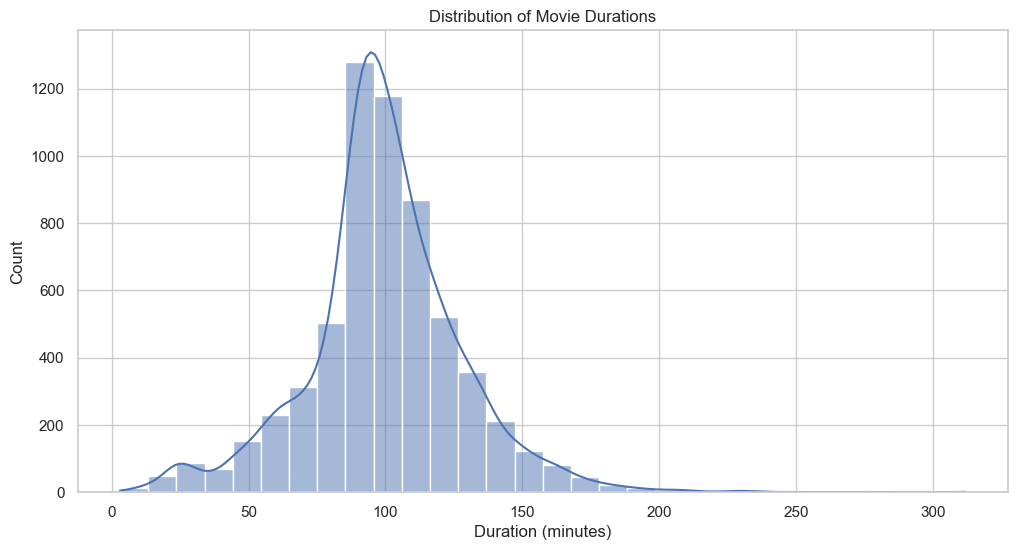

In [11]:
# 11. Movie Duration Analysis (filter only movies)
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)
sns.histplot(movie_df['duration_mins'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

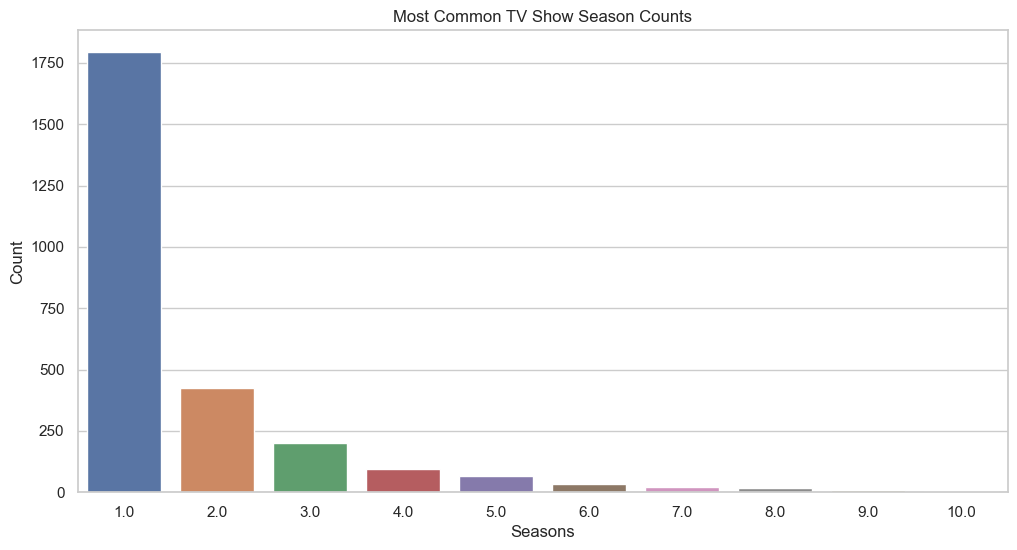

In [12]:
# 12. TV Show Season Count Analysis
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)
sns.countplot(x='seasons', data=tv_df, order=tv_df['seasons'].value_counts().index[:10])
plt.title("Most Common TV Show Season Counts")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

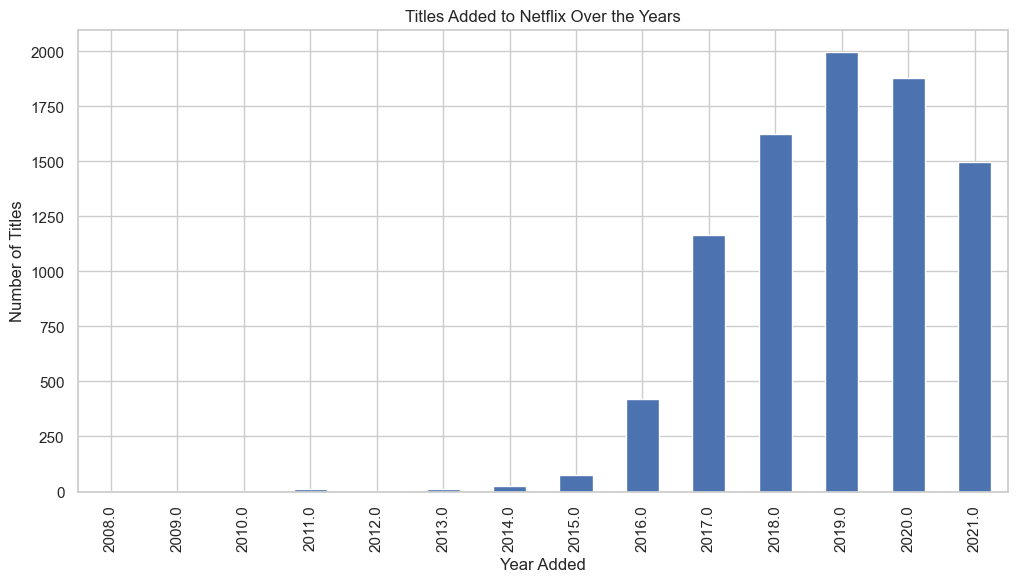

In [13]:
# 13. Time Series: Content added by year
added_years = pd.to_datetime(df['date_added'], errors='coerce').dt.year
added_years.value_counts().sort_index().plot(kind='bar')
plt.title("Titles Added to Netflix Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

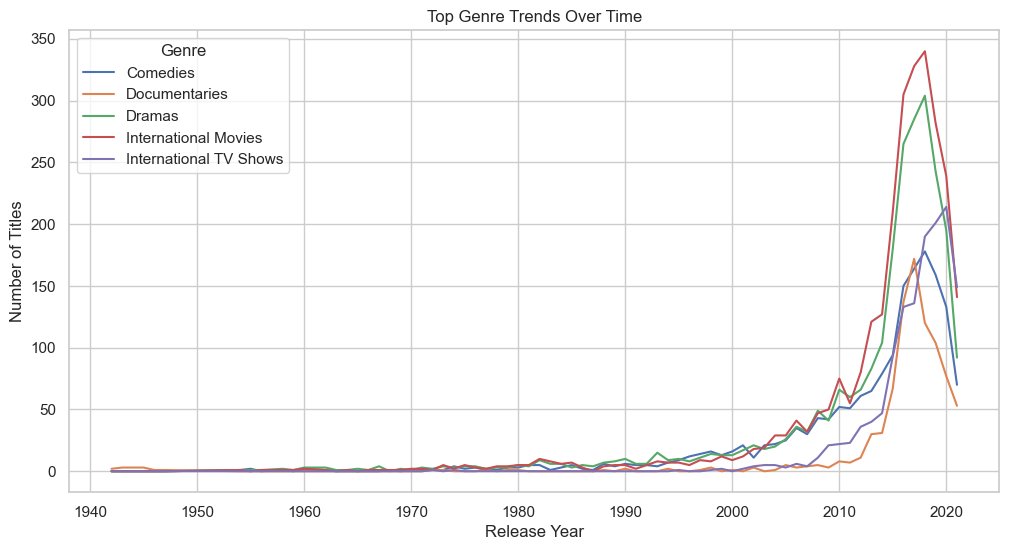

In [14]:
# 14. Genre Trends Over Time
genre_year_df = df[['release_year', 'listed_in']].dropna()
genre_year_df = genre_year_df.assign(genre=genre_year_df['listed_in'].str.split(', ')).explode('genre')
top_genres = genre_year_df['genre'].value_counts().head(5).index
genre_trend = genre_year_df[genre_year_df['genre'].isin(top_genres)].groupby(['release_year', 'genre']).size().unstack().fillna(0)
genre_trend.plot()
plt.title("Top Genre Trends Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title='Genre')
plt.show()

In [15]:
# 15. Conclusion
print("\n--- Conclusion ---")
print("1. Majority of Netflix content is from the USA and India.")
print("2. Most titles are added in recent years, especially 2018-2020.")
print("3. TV Shows commonly have 1-2 seasons; most movies are under 120 minutes.")
print("4. Top genres include Drama, International Movies, and Comedies.")


--- Conclusion ---
1. Majority of Netflix content is from the USA and India.
2. Most titles are added in recent years, especially 2018-2020.
3. TV Shows commonly have 1-2 seasons; most movies are under 120 minutes.
4. Top genres include Drama, International Movies, and Comedies.
